In [ ]:
import statsmodels.api as sm
import pandas as pd
part1 = pd.read_csv('all-data-participant1.csv')
part2 = pd.read_csv('all-data-participant2.csv')
part3 = pd.read_csv('all-data-participant3.csv')
part4 = pd.read_csv('all-data-participant4.csv')
part5 = pd.read_csv('all-data-participant5.csv')
part6 = pd.read_csv('all-data-participant6.csv')
part7 = pd.read_csv('all-data-participant7.csv')
part8 = pd.read_csv('all-data-participant8.csv')
full_data = pd.concat([part1, part2,part3, part4, part5, part6, part7, part8], ignore_index=True)
full_data.dropna(inplace=True)
full_data['time_diff'] = full_data['time_tgt1'] - full_data['time_tgt2']
full_data['time_sum'] = full_data['time_tgt1'] + full_data['time_tgt2']
subset = full_data[['fixations_tgt1', 'jumps_tgt1', 'jumps_tgt2', 'time_diff', 'time_sum', 'choice']]
#full_data.drop(columns=['fixations_tgt2', 'time_tgt1', 'time_tgt2'], inplace=True)
target = subset.loc[:,'choice']
train_sm = subset.drop(columns=['choice'], axis=1)
train_sm.head()
#model = sm.OLS(target, train_sm).fit()
model_reduced = sm.Logit(target, train_sm).fit(maxiter=100)#, regularization='L2')
model_reduced.summary()

# absence - fix1 - no change
# absence - fix2 - jump2 significant
# absence - jump1 - no change
# absence - jump2 - fix2 significant
# absence - time -  no significant
# absence - fix and jumps - time_diff signif

Optimization terminated successfully.
         Current function value: 0.685662
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                  725
Model:                          Logit   Df Residuals:                      720
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Jan 2026   Pseudo R-squ.:                0.008041
Time:                        14:56:52   Log-Likelihood:                -497.10
converged:                       True   LL-Null:                       -501.13
Covariance Type:            nonrobust   LLR p-value:                   0.08943
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
fixations_tgt1     0.0031      0.006      0.486      0.627      -0.009       0.015
jumps_tgt1        -0.0036      0.006     -0.595      0.552      -0.016       0.008
jumps_tgt2         0.0019      0.001      2.096      0.036       0.000       0.004
time_diff          0.0013      0.000      2.609      0.009       0.000       0.002
time_sum          -0.0003      0.000     -1.157      0.247      -0.001       0.000
==================================================================================
"""

In [8]:
full_data

,fixations_tgt1,jumps_tgt1,time_tgt1,fixations_tgt2,jumps_tgt2,time_tgt2,choice,time_diff,time_sum
0,56.0,57.0,136.0,25.0,27.0,62.0,1.0,74.0,198.0
1,171.0,175.0,425.0,38.0,41.0,120.0,1.0,305.0,545.0
2,44.0,44.0,116.0,16.0,16.0,36.0,0.0,80.0,152.0
3,96.0,100.0,220.0,119.0,126.0,282.0,0.0,-62.0,502.0
4,25.0,25.0,55.0,66.0,69.0,153.0,0.0,-98.0,208.0
...,...,...,...,...,...,...,...,...,...
725,250.0,261.0,21.0,264.0,267.0,91.0,1.0,-70.0,112.0
726,189.0,199.0,9.0,243.0,250.0,63.0,0.0,-54.0,72.0
727,243.0,251.0,396.0,138.0,141.0,236.0,0.0,160.0,632.0
728,44.0,44.0,154.0,37.0,37.0,77.0,1.0,77.0,231.0


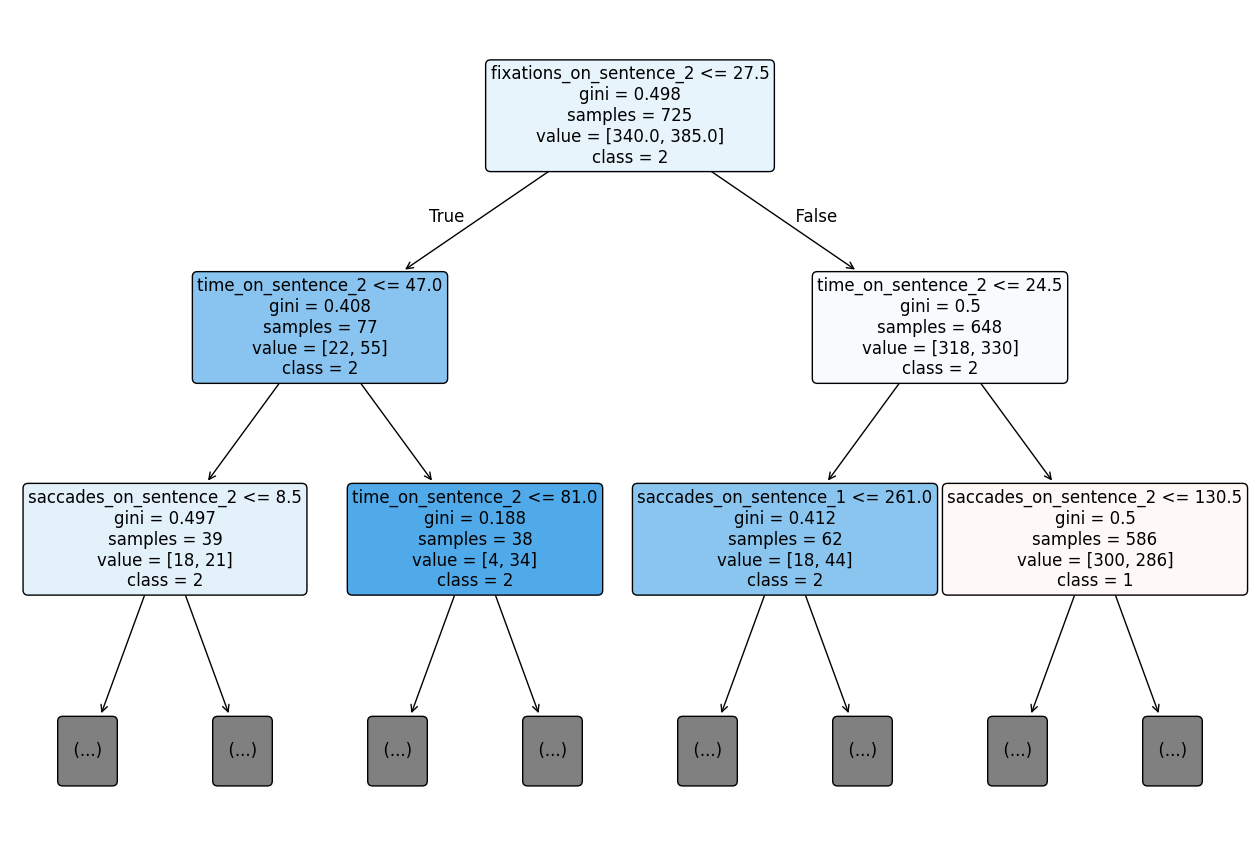

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

y = full_data.loc[:,'choice']
X = full_data.drop(columns=['choice'], axis=1)

X = X.rename(columns={"fixations_tgt1": "fixations_on_sentence_1", "jumps_tgt1": "saccades_on_sentence_1", "time_tgt1": "time_on_sentence_1", "fixations_tgt2": "fixations_on_sentence_2", "jumps_tgt2": "saccades_on_sentence_2", "time_tgt2": "time_on_sentence_2"})

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(16,11))
plot_tree(clf, feature_names=X.columns, class_names=['1', '2'], filled=True, max_depth=2, rounded=True, fontsize=12)
plt.show()

In [5]:
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df

,Feature,Importance
0,fixations_tgt1,0.000000
1,jumps_tgt1,0.080795
2,time_tgt1,0.000000
3,fixations_tgt2,0.204421
4,jumps_tgt2,0.323481
5,time_tgt2,0.391302
6,time_diff,0.000000
7,time_sum,0.000000


In [46]:
full_data = pd.concat([part1, part2,part3, part4, part5, part6, part7, part8], ignore_index=True)
full_data.dropna(inplace=True)
full_data['time_diff'] = full_data['time_tgt1'] - full_data['time_tgt2']
full_data['time_sum'] = full_data['time_tgt1'] + full_data['time_tgt2']
subset = full_data[['fixations_tgt1', 'jumps_tgt1', 'fixations_tgt2', 'jumps_tgt2', 'time_tgt1', 'time_tgt2', 'choice']]
#full_data.drop(columns=['fixations_tgt2', 'time_tgt1', 'time_tgt2'], inplace=True)
target = subset.loc[:,'choice']
train_sm = subset.drop(columns=['choice'], axis=1)
train_sm.head()
#model = sm.OLS(target, train_sm).fit()
model_full = sm.Logit(target, train_sm).fit(maxiter=100)#, regularization='L2')
model_full.summary()

Optimization terminated successfully.
         Current function value: 0.685179
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                  725
Model:                          Logit   Df Residuals:                      719
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                0.008739
Time:                        18:37:29   Log-Likelihood:                -496.75
converged:                       True   LL-Null:                       -501.13
Covariance Type:            nonrobust   LLR p-value:                    0.1191
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
fixations_tgt1     0.0072      0.008      0.897      0.370      -0.009       0.023
jumps_tgt1        -0.0075      0.008     -0.981      0.327      -0.023       0.008
fixations_tgt2    -0.0090      0.011     -0.830      0.406      -0.030       0.012
jumps_tgt2         0.0104      0.010      1.005      0.315      -0.010       0.031
time_tgt1          0.0009      0.000      2.111      0.035    6.69e-05       0.002
time_tgt2         -0.0016      0.001     -2.357      0.018      -0.003      -0.000
==================================================================================
"""

In [ ]:
full_data = pd.concat([part1, part2,part3, part4, part5, part6, part7, part8], ignore_index=True)
full_data.dropna(inplace=True)
full_data['time_diff'] = full_data['time_tgt1'] - full_data['time_tgt2']
full_data['time_sum'] = full_data['time_tgt1'] + full_data['time_tgt2']
subset = full_data[['fix_diff', 'jump_diff', 'time_diff', 'time_sum', 'choice']]
#full_data.drop(columns=['fixations_tgt2', 'time_tgt1', 'time_tgt2'], inplace=True)
target = subset.loc[:,'choice']
train_sm = subset.drop(columns=['choice'], axis=1)
train_sm.head()
#model = sm.OLS(target, train_sm).fit()
model_feature = sm.Logit(target, train_sm).fit(maxiter=100)#, regularization='L2')
model_feature.summary()

Optimization terminated successfully.
         Current function value: 0.688998
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                  725
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            3
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                0.003214
Time:                        14:22:37   Log-Likelihood:                -499.52
converged:                       True   LL-Null:                       -501.13
Covariance Type:            nonrobust   LLR p-value:                    0.3587
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fix_diff       0.0070      0.008      0.891      0.373      -0.008       0.022
jump_diff     -0.0073      0.007     -0.972      0.331      -0.022       0.007
time_diff      0.0008      0.000      1.839      0.066   -5.42e-05       0.002
time_sum       0.0001      0.000      0.771      0.441      -0.000       0.001
==============================================================================
"""

In [40]:
L0 = model_reduced.llf  # log-likelihood of reduced model
L1 = model_full.llf     # log-likelihood of full model
chi2_stat = -2 * (L0 - L1)
df_diff = (len(['fixations_tgt1', 'jumps_tgt1', 'fixations_tgt2', 'jumps_tgt2', 'time_diff', 'time_sum', 'choice']) - len(['fixations_tgt1', 'jumps_tgt1', 'jumps_tgt2', 'time_diff', 'time_sum', 'choice']))

In [42]:
chi2_stat

0.6994336670096573

In [41]:
from scipy.stats import chi2

p_value = 1 - chi2.cdf(chi2_stat, df_diff)

print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", df_diff)
print("p-value:", p_value)

Chi-square statistic: 0.6994336670096573
Degrees of freedom: 1
p-value: 0.40297405578253387


In [ ]:
predictors = ['fixations_tgt1', 
              'fixations_tgt2', 
              'time_diff', 'time_sum']
part1 = pd.read_csv('all-data-participant1.csv')
part2 = pd.read_csv('all-data-participant2.csv')
part3 = pd.read_csv('all-data-participant3.csv')
part4 = pd.read_csv('all-data-participant4.csv')
part5 = pd.read_csv('all-data-participant5.csv')
part6 = pd.read_csv('all-data-participant6.csv')
part7 = pd.read_csv('all-data-participant7.csv')
part8 = pd.read_csv('all-data-participant8.csv')
full_data = pd.concat([part1, part2,part3, part4, part5, part6, part7, part8], ignore_index=True)
full_data.dropna(inplace=True)
full_data['time_diff'] = full_data['time_tgt1'] - full_data['time_tgt2']
full_data['time_sum'] = full_data['time_tgt1'] + full_data['time_tgt2']
X = full_data[predictors]
X['intercept'] = 1
X

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]
print(vif_data)

          feature       VIF
0  fixations_tgt1  3.346630
1  fixations_tgt2  3.238076
2       time_diff  1.293296
3        time_sum  1.533854
4       intercept  2.960732


In [13]:
part1 = pd.read_csv('all-data-participant1.csv')
part2 = pd.read_csv('all-data-participant2.csv')
part3 = pd.read_csv('all-data-participant3.csv')
part4 = pd.read_csv('all-data-participant4.csv')
part5 = pd.read_csv('all-data-participant5.csv')
part6 = pd.read_csv('all-data-participant6.csv')
part7 = pd.read_csv('all-data-participant7.csv')
part8 = pd.read_csv('all-data-participant8.csv')
full_data = pd.concat([part1, part2,part3, part4, part5, part6, part7, part8], ignore_index=True)
full_data.dropna(inplace=True)
full_data['time_diff'] = full_data['time_tgt1'] - full_data['time_tgt2']
full_data['time_sum'] = full_data['time_tgt1'] + full_data['time_tgt2']
full_data['tgt1'] = full_data['fixations_tgt1'] + full_data['jumps_tgt1']
full_data['tgt2'] = full_data['fixations_tgt2'] + full_data['jumps_tgt2']
full_data

,fixations_tgt1,jumps_tgt1,time_tgt1,fixations_tgt2,jumps_tgt2,time_tgt2,choice,time_diff,time_sum,tgt1,tgt2
0,56.0,57.0,136.0,25.0,27.0,62.0,1.0,74.0,198.0,113.0,52.0
1,171.0,175.0,425.0,38.0,41.0,120.0,1.0,305.0,545.0,346.0,79.0
2,44.0,44.0,116.0,16.0,16.0,36.0,0.0,80.0,152.0,88.0,32.0
3,96.0,100.0,220.0,119.0,126.0,282.0,0.0,-62.0,502.0,196.0,245.0
4,25.0,25.0,55.0,66.0,69.0,153.0,0.0,-98.0,208.0,50.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
725,250.0,261.0,21.0,264.0,267.0,91.0,1.0,-70.0,112.0,511.0,531.0
726,189.0,199.0,9.0,243.0,250.0,63.0,0.0,-54.0,72.0,388.0,493.0
727,243.0,251.0,396.0,138.0,141.0,236.0,0.0,160.0,632.0,494.0,279.0
728,44.0,44.0,154.0,37.0,37.0,77.0,1.0,77.0,231.0,88.0,74.0


In [ ]:
full_data.head(50)

In [2]:
time = full_data.drop(columns=['fixations_tgt1', 'jumps_tgt1', 'fixations_tgt2', 'jumps_tgt2'])

In [9]:
import numpy as np
time['more_time_on'] =  np.where(time['time_tgt1'] > time['time_tgt2'], 0.0, 1.0)

In [10]:
time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 729
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time_tgt1     725 non-null    float64
 1   time_tgt2     725 non-null    float64
 2   choice        725 non-null    float64
 3   more_time_on  725 non-null    float64
dtypes: float64(4)
memory usage: 28.3 KB


In [13]:
time[time.choice != time.more_time_on].shape[0]

386

<Axes: xlabel='jumps_tgt2', ylabel='time_tgt2'>

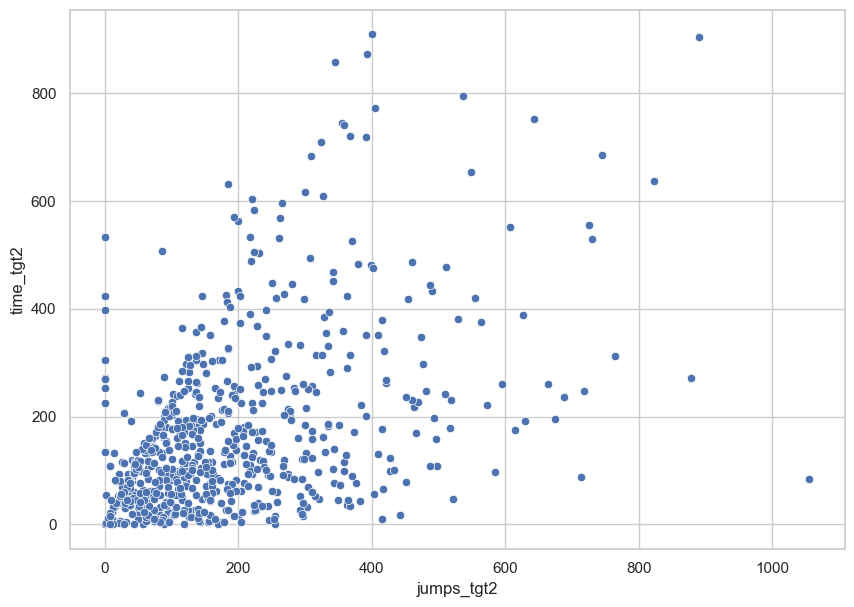

In [9]:
import seaborn
import matplotlib.pyplot as plt
 
seaborn.set_theme(style='whitegrid')
seaborn.color_palette()
fig, ax = plt.subplots(figsize=(10,7))
seaborn.scatterplot(x=full_data['jumps_tgt2'],
                    y=full_data['time_tgt2'])
#ax.set(xlabel='Number of fixations', ylabel='Number of problematic words')